# Drug Abuse Text Preprocessing

---



## Introduction

In [0]:
!pip install nltk

In [0]:
import pandas as pd
import nltk
import numpy as np
from textblob import TextBlob

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [0]:
abuseTweets = pd.read_csv('abuseTweets.txt', delimiter="\t", header=None, names=['tweet_id', 'text', 'user_id', 'abuse'])

In [0]:
abuseTweets

,tweet_id,text,user_id,abuse
0,333644914913079296,i know for a FACT that alcohol does not deplet...,230052171,0
1,344825926342832128,mg Seroquel with my ‘normal’ mg Lovan and mcg ...,179074771,0
2,333854289023864832,SEVEN missed calls? get you're seroquel mg low...,333099736,0
3,344606561873833985,there's a fella on my Facebook who is asking t...,464202509,1
4,341947615853813761,you take vyvanse? I was on that stuff for like...,90304006,0
5,328655421256654849,antipsychotics: quetiapine (sedation); olanzap...,1371093139,0
6,333735685406224385,I take quetiapine and it's supposed to just re...,38919907,0
7,344937940146855937,Seroquel is pretty heavy stuff. I would've tho...,185070700,0
8,342112352130449409,Tell me why this kid just gave me six seroquel...,345065773,0
9,341680382179160065,look at the tweet near that one. I refuse to t...,38971420,0


In [0]:
abuseTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 4 columns):
tweet_id    3017 non-null int64
text        3017 non-null object
user_id     3017 non-null int64
abuse       3017 non-null int64
dtypes: int64(3), object(1)
memory usage: 94.4+ KB




---



## Text Data Preprocessing

**While we do not need to preprocess the text prior to modeling using BERT, for the other classification methods, we will need to preprocess the text and transform it for analysis.**

In [0]:
import nltk
import re
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**We perform the following preprocessing on the text data, using the fix_Text function:**
- Remove punctuation and numbers
- Convert to lower case
- Remove stopwords (english)
- Apply stemming (Snowball)

In [0]:
stop_words = set(stopwords.words("english"))
snow = nltk.stem.SnowballStemmer('english')

def fix_Text(text):
	letters_only = re.sub("[^a-zA-Z]"," ", str(text))
	words=letters_only.lower().split()
	meaningful=[snow.stem(word) for word in words if word not in stop_words]
	return(" ".join(meaningful))

**We can take a look at each step of the fix_Text function individually and compare it to the original text. We will look at the first observation before and after each transformation.**

- Remove punctuation, symbols and numbers

In [0]:
abuseTweets.text[0]

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
re.sub("[^a-zA-Z]"," ", abuseTweets.text[0])

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood  YET HERE WE ARE'

- Convert to lower case

In [0]:
abuseTweets.text[0]

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
abuseTweets.text[0].lower().split()

['i',
 'know',
 'for',
 'a',
 'fact',
 'that',
 'alcohol',
 'does',
 'not',
 'deplete',
 'the',
 'seroquel',
 'levels',
 'in',
 'your',
 'blood,',
 'yet',
 'here',
 'we',
 'are']

- Remove stop words

In [0]:
abuseTweets.text[0]

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
[item for item in abuseTweets.text[0].lower().split() if item not in set(stopwords.words("english"))]

['know', 'fact', 'alcohol', 'deplete', 'seroquel', 'levels', 'blood,', 'yet']

- Apply stemming to tokens

In [0]:
abuseTweets.text[0]


'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
[nltk.stem.SnowballStemmer('english').stem(item) for item in abuseTweets.text[0].lower().split()]

['i',
 'know',
 'for',
 'a',
 'fact',
 'that',
 'alcohol',
 'doe',
 'not',
 'deplet',
 'the',
 'seroquel',
 'level',
 'in',
 'your',
 'blood,',
 'yet',
 'here',
 'we',
 'are']

**Putting all of the transformations together, using the fix_Text function, we can view the first observation before and after.**

In [0]:
abuseTweets.text[0]

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
fix_Text(abuseTweets.text[0])

'know fact alcohol deplet seroquel level blood yet'

**Finally, we can apply the function to the text in each of the observations in the abuseTweets dataframe and view the first 15 observations.**

In [0]:
num_resp = abuseTweets["text"].size

clean_text = []
for i in range(0,num_resp):
	clean_text.append(fix_Text(abuseTweets["text"][i]))

In [0]:
clean_text[0:15]

['know fact alcohol deplet seroquel level blood yet',
 'mg seroquel normal mg lovan mcg clonazepam',
 'seven miss call get seroquel mg lower get ridicul',
 'fella facebook ask swap seroquel yella tramadol hahahahahaha right',
 'take vyvans stuff like year mg month ago switch adderal mg',
 'antipsychot quetiapin sedat olanzapin risperidon aripiprazol lithium augment agent',
 'take quetiapin suppos relax end fall asleep within hour brain alway scatter haha',
 'seroquel pretti heavi stuff would thought would gotten ssri psychotrop',
 'tell kid gave six seroquel two cigarett come lol',
 'look tweet near one refus take seroquel xr anymor bullshit',
 'dead think bedtim fuck quetiapin',
 'may weed seroquel found clean room g',
 'hate hear take seroquel like swallow sleep pill u wake tri function normal',
 'im bout slip seroquel drink gonna knock',
 'prescrib quetiapin obes patient along diet still take quetiapin longer obes amp health good']

**Instead of stemming, lemmatization can be used by slightly altering the last line of the fix_Text function and importing the WordNetLemmatizer, which relies on WordNet.**

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer

In [0]:
abuseTweets.text[0]

'i know for a FACT that alcohol does not deplete the seroquel levels in your blood, YET HERE WE ARE'

In [0]:
[WordNetLemmatizer().lemmatize(item) for item in abuseTweets.text[0].lower().split()]

['i',
 'know',
 'for',
 'a',
 'fact',
 'that',
 'alcohol',
 'doe',
 'not',
 'deplete',
 'the',
 'seroquel',
 'level',
 'in',
 'your',
 'blood,',
 'yet',
 'here',
 'we',
 'are']



---



## Document-Term Representation

### Term Frequency

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
tfVectorizer=CountVectorizer()
tfdtm= tfVectorizer.fit_transform(clean_text)

In [0]:
tfdtm

<3017x4532 sparse matrix of type '<class 'numpy.int64'>'
	with 26218 stored elements in Compressed Sparse Row format>

In [0]:
tfVectorizer.get_feature_names()[0:15]

['abbi',
 'abid',
 'abil',
 'abilifi',
 'abl',
 'abook',
 'absenc',
 'absolut',
 'abus',
 'ac',
 'academ',
 'acceler',
 'accept',
 'access',
 'accid']

In [0]:
pip install wordcloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
text_wc = " ".join(item for item in clean_text)

In [0]:
wordcloud = WordCloud(background_color="white").generate(text_wc)

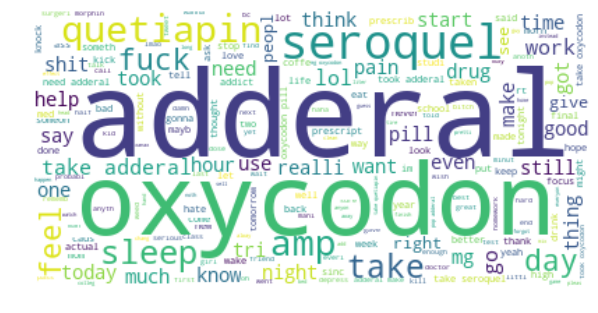

In [0]:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show() 

### Term Frequency-Inverse Document Frequency

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidfVectorizer=TfidfVectorizer(min_df=15)
tfidfdtm = tfidfVectorizer.fit_transform(clean_text)

In [0]:
tfidfdtm

<3017x311 sparse matrix of type '<class 'numpy.float64'>'
	with 16013 stored elements in Compressed Sparse Row format>

In [0]:
tfidfVectorizer.get_feature_names()[0:15]

['abus',
 'actual',
 'add',
 'adderal',
 'addict',
 'adhd',
 'ago',
 'alcohol',
 'almost',
 'alreadi',
 'also',
 'alway',
 'amount',
 'amp',
 'anoth']

In [0]:
tfidf_df = pd.DataFrame(tfidfdtm.toarray(), columns=tfidfVectorizer.get_feature_names())

In [0]:
tfidf_df

,abus,actual,add,adderal,addict,adhd,ago,alcohol,almost,alreadi,also,alway,amount,amp,anoth,anyon,anyth,around,ask,asleep,ass,awak,away,back,bad,bc,bed,best,better,big,bipolar,bitch,bodi,bottl,bout,bull,call,caus,chang,class,...,tomorrow,tonight,took,tri,turn,tweet,two,us,use,vyvans,wait,wake,walk,wanna,want,watch,way,weed,week,weight,weird,well,went,whole,wisdom,wish,without,wonder,work,world,would,wow,write,xanax,xr,yeah,year,yes,yesterday,yet
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.625806,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.571716
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.450944,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.684981,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.110288,0.0,0.000000,0.358601,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.369393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.302382,0.0,0.0,0.000000
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
6,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.369298,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.369298,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000

In [0]:
tweets_w_text = pd.concat([tfidf_df, abuseTweets.abuse], axis=1, sort=False)

In [0]:
tweets_w_text

,abus,actual,add,adderal,addict,adhd,ago,alcohol,almost,alreadi,also,alway,amount,amp,anoth,anyon,anyth,around,ask,asleep,ass,awak,away,back,bad,bc,bed,best,better,big,bipolar,bitch,bodi,bottl,bout,bull,call,caus,chang,class,...,tonight,took,tri,turn,tweet,two,us,use,vyvans,wait,wake,walk,wanna,want,watch,way,weed,week,weight,weird,well,went,whole,wisdom,wish,without,wonder,work,world,would,wow,write,xanax,xr,yeah,year,yes,yesterday,yet,abuse
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.625806,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.571716,0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.450944,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.684981,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1
4,0.0,0.0,0.000000,0.110288,0.0,0.000000,0.358601,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.369393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.302382,0.0,0.0,0.000000,0
5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
6,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.369298,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.369298,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00

In [0]:
from google.colab import files
tweets_w_text.to_csv('tfidfDTM.txt', index=False, sep="\t", header=True) 
files.download('tfidfDTM.txt')